### Freely available data sources
---

* FRED: Economic and market data

    * A vast repository of economic and financial data

* Alphe Vantage: Equities, currencies, cryptocurrencies, sectors, indicators

    * Real time and historical API

* Yahoo Finance: free one stop shop for various financial securities

    * Unstable endpoints and data reader needs a bug fix

* IEX Cloud: Equity, ETF, market and fundamental data

* EDGAR: Company fundamental data

### IMPORT MODULES

In [1]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import json
import requests

C:\Users\satoshi\AppData\Local\Temp\ipykernel_5384\2927230935.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Federal Reserve Economic Data (FRED)

The most comprehensive repository for U.S. economic time series data. It has more than half a million timeseries from 87 sources. It covers banking, business/fiscal, consumer price indexes, employment and population, exchange rates, gross domestic product, interest rates, monetary aggergates, producer price indexes, reserves and monetary base, U.S. trade and international transactions, and U.S. financial data. The timeseries are compiled by the Federal Reserve and many are colected from government agencies such as U.S. Census and the Bureau of Labor Statistics.

See all the timeseries here: https://fred.stlouisfred.org/

In [2]:
start = datetime(2018,1,1)
end = datetime(2023,6,1) # (2019,4,30) used in example

In [3]:
inflation = pdr.DataReader('T5YIE', 'fred', start, end)
inflation.sample(5, random_state = 10)

,T5YIE
DATE,
2018-11-12,NaN
2019-01-09,1.68
2020-11-24,1.65
2020-09-01,1.65
2020-07-08,1.25


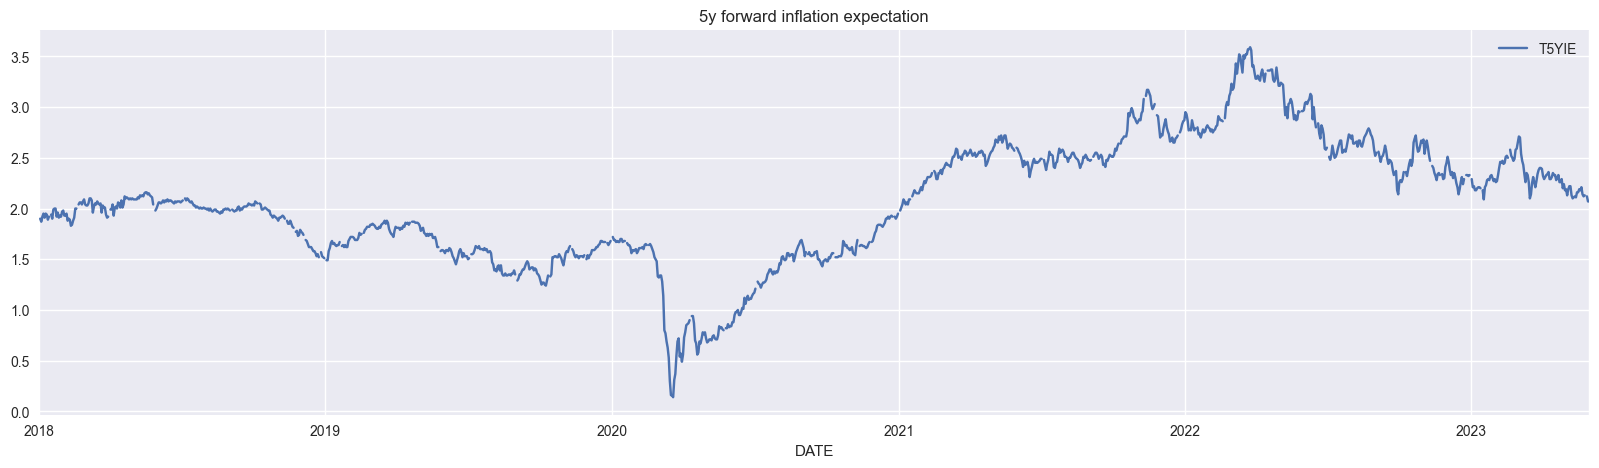

In [4]:
inflation.plot(figsize=(20,5), title='5y forward inflation expectation')
plt.show()

### Alpha Vantage
---

Repository of free APIs for realtime (up to 1 min) and historical data (up to 20y). Suggestes usage is 5 API requests per minute and 500 requests per day with your own API key.

APIs are grouped in to 4 categories:

* Equity
* Currency (including cryptocurrency)
* Sectors
* Technical indicators

Run by a tight-knit community of researchers, engineers, and business professionals. Website supports CSV and JSON format.

API Docs: https://www.alphavantage.co/documentation/

In [5]:
from dontshare_config import ALPHA_VANTAGE_API_KEY

In [6]:
response = requests.get(f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey={ALPHA_VANTAGE_API_KEY}')
alphadict = json.loads(response.text)
alphadict

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)',
  '2. From Symbol': 'EUR',
  '3. To Symbol': 'USD',
  '4. Output Size': 'Compact',
  '5. Last Refreshed': '2023-08-10 19:40:00',
  '6. Time Zone': 'UTC'},
 'Time Series FX (Daily)': {'2023-08-10': {'1. open': '1.09770',
   '2. high': '1.10652',
   '3. low': '1.09660',
   '4. close': '1.09812'},
  '2023-08-09': {'1. open': '1.09536',
   '2. high': '1.09954',
   '3. low': '1.09500',
   '4. close': '1.09759'},
  '2023-08-08': {'1. open': '1.10031',
   '2. high': '1.10111',
   '3. low': '1.09280',
   '4. close': '1.09535'},
  '2023-08-07': {'1. open': '1.10105',
   '2. high': '1.10139',
   '3. low': '1.09640',
   '4. close': '1.10029'},
  '2023-08-04': {'1. open': '1.09472',
   '2. high': '1.10420',
   '3. low': '1.09340',
   '4. close': '1.10072'},
  '2023-08-03': {'1. open': '1.09383',
   '2. high': '1.09629',
   '3. low': '1.09110',
   '4. close': '1.09483'},
  '2023-08-02': {'1. open': '1.10178',
   '2. hig

In [7]:
alphadict.keys()

dict_keys(['Meta Data', 'Time Series FX (Daily)'])

In [8]:
alphadict['Time Series FX (Daily)']

{'2023-08-10': {'1. open': '1.09770',
  '2. high': '1.10652',
  '3. low': '1.09660',
  '4. close': '1.09812'},
 '2023-08-09': {'1. open': '1.09536',
  '2. high': '1.09954',
  '3. low': '1.09500',
  '4. close': '1.09759'},
 '2023-08-08': {'1. open': '1.10031',
  '2. high': '1.10111',
  '3. low': '1.09280',
  '4. close': '1.09535'},
 '2023-08-07': {'1. open': '1.10105',
  '2. high': '1.10139',
  '3. low': '1.09640',
  '4. close': '1.10029'},
 '2023-08-04': {'1. open': '1.09472',
  '2. high': '1.10420',
  '3. low': '1.09340',
  '4. close': '1.10072'},
 '2023-08-03': {'1. open': '1.09383',
  '2. high': '1.09629',
  '3. low': '1.09110',
  '4. close': '1.09483'},
 '2023-08-02': {'1. open': '1.10178',
  '2. high': '1.10181',
  '3. low': '1.09170',
  '4. close': '1.09381'},
 '2023-08-01': {'1. open': '1.09966',
  '2. high': '1.10195',
  '3. low': '1.09510',
  '4. close': '1.10181'},
 '2023-07-31': {'1. open': '1.10180',
  '2. high': '1.10459',
  '3. low': '1.09920',
  '4. close': '1.09968'},
 

In [9]:
## creating the timeseries df
eur = pd.DataFrame(alphadict['Time Series FX (Daily)']).T
eur.index = pd.to_datetime(eur.index)
eur.head()

,1. open,2. high,3. low,4. close
2023-08-10,1.09770,1.10652,1.09660,1.09812
2023-08-09,1.09536,1.09954,1.09500,1.09759
2023-08-08,1.10031,1.10111,1.09280,1.09535
2023-08-07,1.10105,1.10139,1.09640,1.10029
2023-08-04,1.09472,1.10420,1.09340,1.10072


we can see that the index is in descending order (new to old), namely the most recent dates are first and the older dates are to the bottom, we need to sort this in ascending order. from old to new.

In [10]:
eur = eur.sort_index(ascending=True)


In [11]:
eur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-03-24 to 2023-08-10
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   1. open   100 non-null    object
 1   2. high   100 non-null    object
 2   3. low    100 non-null    object
 3   4. close  100 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


* dtypes are not right need to convert to float
* column names need to be made simpler

In [12]:
eur.columns = ['open', 'high', 'low', 'close'] # fixing columns

In [13]:
eur = eur.astype(float)
eur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-03-24 to 2023-08-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


<Figure size 2000x500 with 0 Axes>

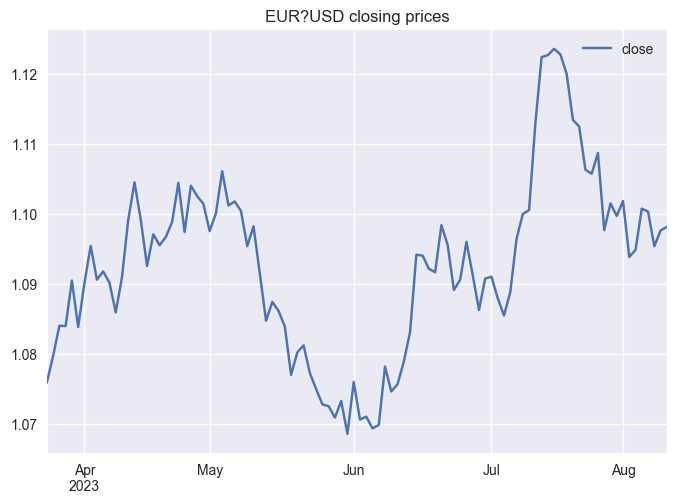

In [14]:
plt.figure(figsize=(20,5))
eur.plot(y='close', title='EUR?USD closing prices')
plt.show()

<Axes: >

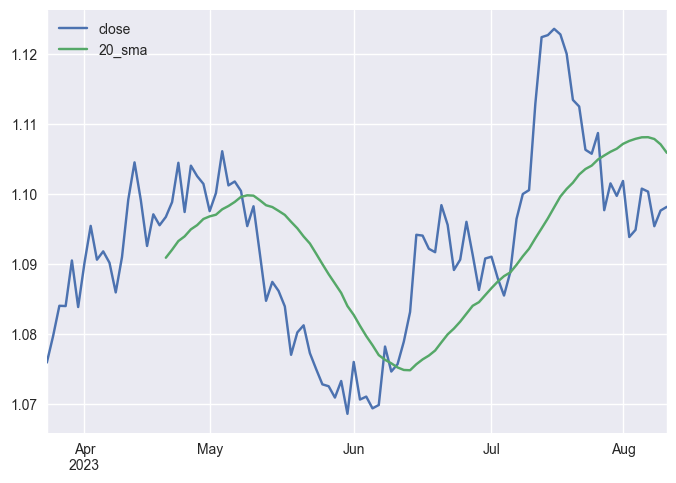

In [15]:
eur['20_sma'] = eur['close'].rolling(20).mean()
eur[['close','20_sma']].plot()

GOOD TO GO !

### Yahoo Finance
---
This is the grand daddy of free financial information. It has a vast repository of historical data that cover most traded securites. There is a pandas datareader that requires a bug fix which is provided below. However the API is not reliable and will not return data sometimes.

In [23]:
import yfinance as yf
stock = yf.download('AMZN', start, end)
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


In [21]:
stock.shape

(1362, 6)

### Quandl
---

A one stop shop for economic, financial and sentiment data some of it is offered for free and most others for a fee. Quandl sources data from half a million publishers worldwide. It was acquired by NASDAQ in 2018. It sources freely available public sources like FRED and private sources of alternative data. Many freely available data, such as historical equity data, are offered for a fee. Anonymous users have a limit of 20 calls per 10 minutes and 50 calls per day. Authenticated users have a limit of 300 calls per 10 seconds, 2,000 calls per 10 minutes and a limit of 50,000 calls per day. Authenticated users of free data feeds have a concurrency limit of one; that is, they can make one call at a time and have an additional call int he queue.

See API documentation here: https://docs.quandl.com/

In [24]:
#!pip install quandl

  Obtaining dependency information for more-itertools from https://files.pythonhosted.org/packages/5a/cb/6dce742ea14e47d6f565589e859ad225f2a5de576d7696e0623b784e226b/more_itertools-10.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/55.8 kB ? eta -:--:--
   ---------------------------------------- 55.8/55.8 kB ? eta 0:00:00


In [25]:
import quandl

In [29]:
investor_sentiment = quandl.get('AAII/AAII_SENTIMENT', start_date=start, end_date=end)

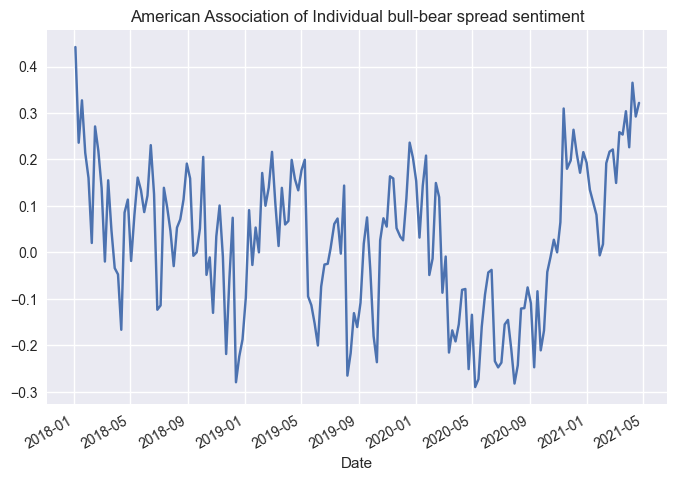

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
2018-01-04,0.597531,0.246914,0.155556,1.000001,0.431950,0.441975,0.380245,0.480891,0.279599,2714.37,2673.61,2713.06
2018-01-11,0.486726,0.262537,0.250737,1.000000,0.456106,0.235989,0.380245,0.480891,0.279599,2759.14,2697.77,2748.23
2018-01-18,0.541133,0.244973,0.213894,1.000000,0.479381,0.327239,0.380245,0.480891,0.279599,2807.54,2736.06,2802.56
2018-01-25,0.454545,0.305195,0.240260,1.000000,0.491267,0.214285,0.380245,0.480891,0.279599,2852.97,2778.38,2837.54
2018-02-01,0.447712,0.264706,0.287582,1.000000,0.501135,0.160130,0.380245,0.480891,0.279599,2872.87,2813.04,2823.81


In [32]:
investor_sentiment['Bull-Bear Spread'].plot(title='American Association of Individual bull-bear spread sentiment')
plt.show()
investor_sentiment.head()

<Axes: title={'center': 'Trailing 12m price to earning ratio of SP500 companies'}, xlabel='Date'>

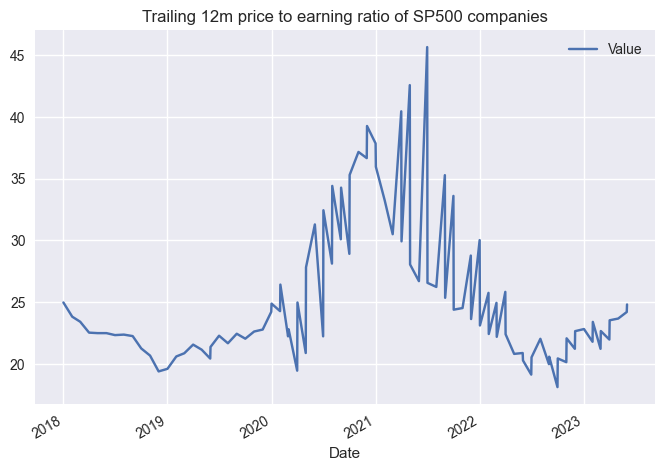

In [35]:
spx = quandl.get('MULTPL/SP500_PE_RATIO_MONTH', start_date= start, end_date= end)
spx.plot(title='Trailing 12m price to earning ratio of SP500 companies')

### IEX Cloud
---

The Investors Exchange (IEX) was founded by Brad Katsuyama, hero of the book 'Flash Boys' by Michael Lewis. IEX recently announced IEX Cloud, a new platform provides market and information data for free and for a fee. The default data format is JSON. See code snippets below.

For more information about the APIs, see: https://iexcloud.io/docs/api/#introduction

In [47]:
response = requests.get('https://api.iex.cloud/v1/data/CORE/QUOTE/MSFT?token=pk_984ec1955dc4492297b5fd7a2dca0e6f')
response.text

'Access is restricted to paid subscribers. Please upgrade to gain access'